
## 1. Basics of Probability

### (a) Tossing a Coin 10,000 Times

We simulate tossing a coin 10,000 times to calculate the probability of heads and tails using Python's `random` module.


In [13]:

import random

def simulate_coin_tosses(n=10000):
    results = {'Heads': 0, 'Tails': 0}
    for _ in range(n):
        toss = random.choice(['Heads', 'Tails'])
        results[toss] += 1
    prob_heads = results['Heads'] / n
    prob_tails = results['Tails'] / n
    return prob_heads, prob_tails

ph, pt = simulate_coin_tosses()
print("Experimental Probability (Heads):", ph)
print("Experimental Probability (Tails):", pt)


Experimental Probability (Heads): 0.502
Experimental Probability (Tails): 0.498



### (b) Rolling Two Dice, Getting Sum of 7

We roll two dice and count the fraction of times their sum is 7.


In [2]:

def simulate_two_dice(trials=10000):
    success = 0
    for _ in range(trials):
        die1 = random.randint(1, 6)
        die2 = random.randint(1, 6)
        if die1 + die2 == 7:
            success += 1
    return success / trials

p_sum_7 = simulate_two_dice()
print("Experimental Probability (Sum = 7):", p_sum_7)


Experimental Probability (Sum = 7): 0.1645



## 2. Estimate Probability of "At Least One 6" in 10 Die Rolls

We roll a fair die 10 times and check if at least one 6 appears, repeating this many times to estimate the probability.


In [3]:

def estimate_at_least_one_six(trials=10000, rolls=10):
    success = 0
    for _ in range(trials):
        outcome = [random.randint(1, 6) for _ in range(rolls)]
        if 6 in outcome:
            success += 1
    probability = success / trials
    return probability

p_at_least_one_six = estimate_at_least_one_six()
print("Probability of at least one 6 in 10 rolls:", p_at_least_one_six)


Probability of at least one 6 in 10 rolls: 0.8417



## 3. Conditional Probability & Bayes’ Theorem: Balls in a Bag

Simulate drawing (with replacement) a ball from a bag containing 5 red, 7 green, and 8 blue balls. Compute:
- The probability of drawing a red ball, given the previous ball was blue.
- Verification of Bayes' theorem with the simulated results.


In [4]:

def simulate_balls(trials=1000):
    colors = ['Red']*5 + ['Green']*7 + ['Blue']*8
    count_prev_blue = count_red_given_prev_blue = 0
    count_prev_red = count_blue_given_prev_red = 0
    draws = [random.choice(colors) for _ in range(trials)]
    for i in range(1, trials):
        if draws[i-1] == 'Blue':
            count_prev_blue += 1
            if draws[i] == 'Red':
                count_red_given_prev_blue += 1
        if draws[i-1] == 'Red':
            count_prev_red += 1
            if draws[i] == 'Blue':
                count_blue_given_prev_red += 1
    p_red_given_blue = count_red_given_prev_blue / count_prev_blue if count_prev_blue else 0
    p_blue_given_red = count_blue_given_prev_red / count_prev_red if count_prev_red else 0
    # Also estimate marginal probabilities from draws
    p_red = draws.count('Red') / trials
    p_blue = draws.count('Blue') / trials
    return p_red_given_blue, p_blue_given_red, p_red, p_blue

prb, pbr, pred, pblue = simulate_balls()
print(f"P(Red | Previous Blue): {prb}")
print(f"P(Blue | Previous Red): {pbr}")
print(f"P(Red): {pred}")
print(f"P(Blue): {pblue}")

# Bayes' theorem: P(Red|Blue) = P(Blue|Red)*P(Red)/P(Blue)
bayes_result = pbr * pred / pblue if pblue != 0 else 0
print(f"Bayes' Theorem Estimate for P(Red|Blue): {bayes_result}")


P(Red | Previous Blue): 0.2518518518518518
P(Blue | Previous Red): 0.3828996282527881
P(Red): 0.269
P(Blue): 0.405
Bayes' Theorem Estimate for P(Red|Blue): 0.254320987654321



## 4. Discrete Random Variable: Empirical Mean, Variance, and Standard Deviation

Sample 1,000 values from a discrete variable with P(X=1)=0.25, P(X=2)=0.35, P(X=3)=0.4. Compute statistics.


In [5]:

import numpy as np

values = [1, 2, 3]
probs = [0.25, 0.35, 0.4]
sample = np.random.choice(values, size=1000, p=probs)

mean = np.mean(sample)
variance = np.var(sample)
std_dev = np.std(sample)

print("Sample Mean:", mean)
print("Sample Variance:", variance)
print("Sample Std Dev:", std_dev)


Sample Mean: 2.153
Sample Variance: 0.6315909999999999
Sample Std Dev: 0.7947269971505938



## 5. Exponential Distribution Simulation and Visualization

Generate 2,000 samples from an exponential distribution (mean=5). Show histogram and probability density function overlay.


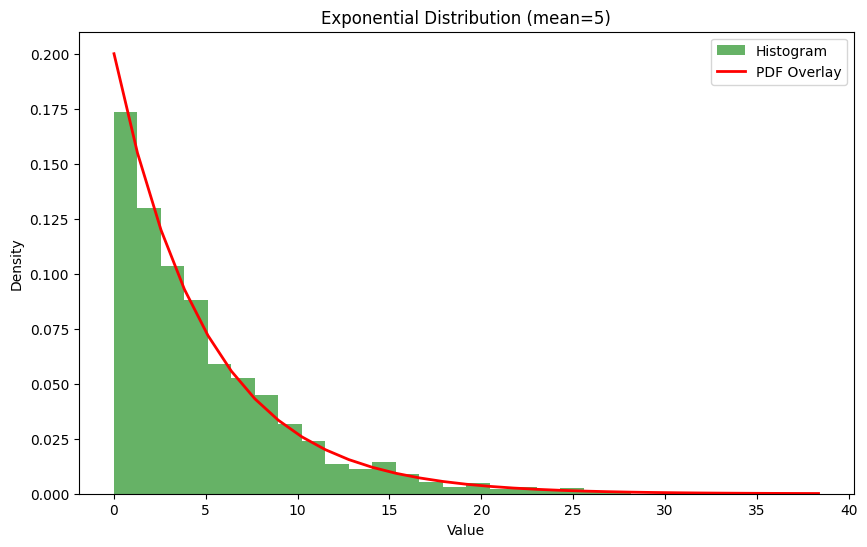

In [8]:

import matplotlib.pyplot as plt

exp_data = np.random.exponential(scale=5, size=2000)

plt.figure(figsize=(10, 6))
# Histogram
count, bins, ignored = plt.hist(exp_data, bins=30, density=True, alpha=0.6, color='g', label='Histogram')
# PDF overlay
pdf = (1/5) * np.exp(-bins/5)
plt.plot(bins, pdf, linewidth=2, color='r', label='PDF Overlay')
plt.title('Exponential Distribution (mean=5)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()



## 6. Central Limit Theorem (CLT) Simulation

Show that the distribution of sample means is nearly normal, even if the source is uniform.


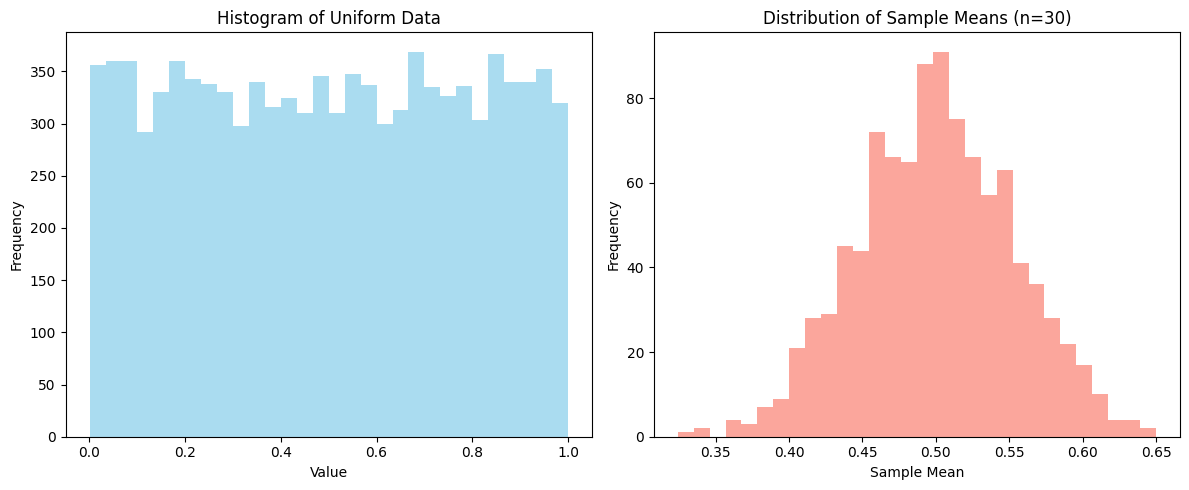

In [9]:

uniform_data = np.random.uniform(0, 1, 10000)
sample_means = [np.mean(np.random.choice(uniform_data, 30)) for _ in range(1000)]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(uniform_data, bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of Uniform Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, color='salmon', alpha=0.7)
plt.title('Distribution of Sample Means (n=30)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
